# Notebook to Load, Use & Export data from GWYddion files (.gwy)

- Requires Python 2.7 
- gwyfile package via pip/git
- 

In [ ]:
!pip install numpy
!pip install matplotlib
!pip install scipy
!pip install pillow
!pip install pandas
!pip install tqdm
!pip install scikit-image

!pip install gwyfile

# Import Default Libs to load Data

In [1]:
import os, sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm 
from tqdm import tqdm
from tqdm import trange
import glob
import shutil
import gc

from skimage.transform import resize
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import skew, kurtosis

In [8]:
import gwyfile as gw

Gwy files is presented as a Tree structure with objects (i.e. objects are considered as each scan element with Meta Data)

In [ ]:
test = gw.load(r"Compound_158_TCA-tetra-OC2OC2OH\1\2023.05.04_0.gwy")
test

GwyContainer([(u'/0/3d/max',
               GwyObject([(u'delta_x', 0.0),
                          (u'delta_y', 0.0),
                          (u'rotation', 0.0),
                          (u'size', 15.0),
                          (u'text', u'$max'),
                          (u'default_text', u'$max'),
                          (u'fixed_size', False)])),
              (u'/0/3d/min',
               GwyObject([(u'delta_x', 0.0),
                          (u'delta_y', 0.0),
                          (u'rotation', 0.0),
                          (u'size', 15.0),
                          (u'text', u'$min'),
                          (u'default_text', u'$min'),
                          (u'fixed_size', False)])),
              (u'/0/3d/palette', u'Gwyddion.net'),
              (u'/0/3d/setup',
               GwyObject([(u'projection', 0),
                          (u'visualization', 0),
                          (u'axes-visible', True),
                          (u'labels-visible', True

In [177]:
gw.util.get_datafields(test)

{u'1B:SensHeight (10)': GwyDataField([(u'xres', 512),
               (u'yres', 512),
               (u'xreal', 3.0004989767441813e-05),
               (u'yreal', 3.0004989767441813e-05),
               (u'si_unit_xy', GwySIUnit([(u'unitstr', u'm')])),
               (u'si_unit_z', GwySIUnit([(u'unitstr', u'm')])),
               (u'data',
                array([3.40378653e-06, 3.40443237e-06, 3.40499210e-06, ...,
                       4.16932821e-06, 4.16954350e-06, 4.17018934e-06]))]),
 u'1B:SensHeight (14)': GwyDataField([(u'xres', 512),
               (u'yres', 512),
               (u'xreal', 5.004989767441848e-06),
               (u'yreal', 5.004989767441848e-06),
               (u'si_unit_xy', GwySIUnit([(u'unitstr', u'm')])),
               (u'si_unit_z', GwySIUnit([(u'unitstr', u'm')])),
               (u'data',
                array([3.72270482e-06, 3.72244648e-06, 3.72201592e-06, ...,
                       3.78586847e-06, 3.78561013e-06, 3.78526568e-06]))]),
 u'1B:SensHeight

--------

# Our use requires us to select Sensheight i.e. Raw height (after post processing) 

In [178]:
channels = gw.util.get_datafields(test)


In [179]:
list(channels) # List of all height data

[u'1F:SensHeight (13)',
 u'1F:Phase1 (12)',
 u'1F:SensHeight (1)',
 u'1F:Phase1 (4)',
 u'1F:Mag1 (3)',
 u'1F:Phase1 (8)',
 u'1F:Mag1 (11)',
 u'1B:SensHeight (14)',
 u'1F:Mag1 (7)',
 u'1F:Phase1 (16)',
 u'1F:SensHeight (5)',
 u'1B:SensHeight (6)',
 u'1B:SensHeight (10)',
 u'1F:SensHeight (9)',
 u'1B:SensHeight (2)',
 u'1F:Mag1 (15)']

In [180]:
channels['1F:SensHeight (9)']

GwyDataField([(u'xres', 512),
              (u'yres', 512),
              (u'xreal', 3.0004989767441813e-05),
              (u'yreal', 3.0004989767441813e-05),
              (u'si_unit_xy', GwySIUnit([(u'unitstr', u'm')])),
              (u'si_unit_z', GwySIUnit([(u'unitstr', u'm')])),
              (u'data',
               array([1.08973835e-08, 1.19086647e-08, 1.39102418e-08, ...,
                      5.18374847e-08, 5.24612589e-08, 5.36017091e-08]))])

Each datafield inside the represent the following: 

- **xres, yres** = Resolution of the scan *(in pixels)*
- **xreal, yreal** = Scale size of the scans *(in µm)*
- **si_unit_xy** = Unit of the x & y dimension *(in µm or nm)*
- **si_unit_z** = Unit of the Z dimension (i.e. height) *(in µm or nm)*
- **Data** = Height data in the dimension of **xres**, **yres** with scale of **xreal**, **yreal**

In [181]:
data = channels['1F:SensHeight (9)'].data

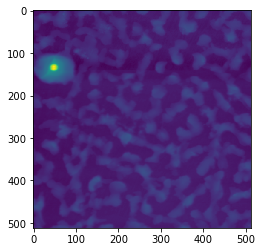

In [182]:
plt.imshow(data)

-------

# Colour Pallette Selection

Below is replicated Colour Map of the default Gwyddion.Net that is widely used in publications etc. 

To replicate a specific Colour pallete, the simplest way is to extract the HEX code of the colour pattern and re-create it via LinearSegmentedColormap function in matplotlib


Steps in Gwyddion: 

Edit -> Colour Gradients -> Add or Duplicate an existing colour gradient -> Edit 

IMAGE_1

In [46]:
!pip install colour

DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support


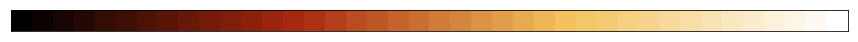

In [2]:
# Source - https://stackoverflow.com/a
# Posted by Can Sucuoglu
# Retrieved 2025-12-09, License - CC BY-SA 4.0

def make_Ramp( ramp_colors ): 
    from colour import Color
    from matplotlib.colors import LinearSegmentedColormap

    color_ramp = LinearSegmentedColormap.from_list( 'my_list', [ Color( c1 ).rgb for c1 in ramp_colors ] )
    plt.figure( figsize = (15,3))
    plt.imshow( [list(np.arange(0, len( ramp_colors ) , 0.1)) ] , interpolation='nearest', origin='lower', cmap= color_ramp )
    plt.xticks([])
    plt.yticks([])
    return color_ramp

custom_ramp = make_Ramp( ['#000000','#A8280F','#F3C25D','#FFFFFF'] ) 


In [4]:
plt.imshow(data, cmap = custom_ramp)

NameError: name 'data' is not defined

-------

# Generation of Metrics

1. scan_area_x = 30 
2. scan_area_y = 30
3. scan_units = um/nm
3. scan_units_z = um/nm
4. scan_dim_x =  512 Dimension X
5. scan_dim_y =  512 Dimension Y

6. mean_value = mean surface 
7. sa = Mean surface roughness (sa)
8. sq = Mean RMS surface roughness (sq)
9. skew = Skewness
10. kur = Kurtosis

11. min_h = Minimum height
12. max_h = Maximum height
13. med_h = Median height
14. sv = 
15. sp = 
16. sz = 

17. pixel_area = area covered by each pixel relative to scan_units
18. proj_area =
19. surface_area = 
20. vol = volume


E20. Surface Slope (Sdq) 

E21. SDR (Developed Interfacial Area Ratio)

E22. Variation 


In [3]:
from scipy.stats import skew, kurtosis

def gen_metrics(obj):
    
    '''
    Input: 
        gwy(obj): Gwyddion Obj with Channels of data (e.g. gw.util.get_datafields(test)['1B:SensHeight (10)'])

    Output:
        metrics (DataFrame): A pandas dataframe with all above metrics 


    '''

    scan_area_x = obj['xreal']
    scan_area_y = obj['yreal']

    scan_units = obj['si_unit_xy']
    scan_units_z = obj['si_unit_z']

    scan_dim_x = obj['xres']
    scan_dim_y = obj['yres']

    mean_value = obj.data.mean()
    centered_data = obj.data - mean_value # 
    abs_centered_data = np.abs(centered_data)
    centered_data_sq = abs_centered_data**2

    sa = np.sum(abs_centered_data)/(scan_dim_x*scan_dim_y)
    sq = np.sqrt(np.sum(centered_data_sq)/(scan_dim_x*scan_dim_y))
    skewness = skew(obj.data, axis = None)
    kur = kurtosis(obj.data, axis = None)

    min_h = obj.data.min()
    max_h = obj.data.min()
    med_h = np.median(obj.data)

    sp = centered_data.max()
    sv = np.abs(centered_data.min())
    sz = sp+sv

    pixel_area = ((scan_area_x*scan_area_y)/(scan_dim_x*scan_dim_x)) # (L*W)/(N*M)
    proj_area = (scan_area_x*scan_area_y)

    dz_y = np.diff(obj.data, axis=0)
    dz_x = np.diff(obj.data, axis=1)
    step_y = scan_area_y/scan_dim_y-1 
    step_x = scan_area_x/scan_dim_x-1
    cross_x = step_y * dz_y[:, :-1]
    cross_y = step_x * dz_x[:-1, :]
    cross_z = step_x * step_y
    areas = 0.5*np.sqrt(cross_x ** 2 + cross_y **2 + cross_z ** 2)
    surface_area = 2*np.sum(areas)

    
    vol = pixel_area*(obj.data.sum())

    header = ['scan_area_x',
              'scan_area_y',
              'scan_units',
              'scan_units_z',
              'scan_dim_x',
              'scan_dim_y',
              'mean_value',
              'sa',
              'sq',
              'skew',
              'kur',
              'min_h',
              'max_h',
              'med_h',
              'sp',
              'sv',
              'sz',
              'pixel_area',
              'proj_area',
              'surface_area',
              'vol']
    
    metrics = pd.DataFrame([scan_area_x,
              scan_area_y,
              scan_units,
              scan_units_z,
              scan_dim_x,
              scan_dim_y,
              mean_value,
              sa,
              sq,
              skewness,
              kur,
              min_h,
              max_h,
              med_h,
              sp,
              sv,
              sz,
              pixel_area,
              proj_area,
              surface_area,
              vol], index = header).transpose()
    
    return metrics

In [343]:
gen_metrics(channels['1F:SensHeight (9)'])

,scan_area_x,scan_area_y,scan_units,scan_units_z,scan_dim_x,scan_dim_y,mean_value,sa,sq,skew,...,min_h,max_h,med_h,sp,sv,sz,pixel_area,proj_area,surface_area,vol
0,3.0005e-05,3.0005e-05,{u'unitstr': u'm'},{u'unitstr': u'm'},512,512,3.68796e-08,1.41883e-08,1.99575e-08,3.51277,...,0,0,3.27389e-08,3.07927e-07,3.68796e-08,3.44806e-07,3.43437e-15,9.00299e-10,261121,3.32027e-17


-----

## Folder Overivew 


```
AFM_Data/
    |___Compound_158/
        |___1/
            |___SCAN.gwy
        |___2
        |___3
        |___4
        |___5
        |___6
    |___Compound_159
    |___Compound_160
    |___Compound_161
    |___Compound_162



## Export Folder Structure

```
AFM_Data_Processed/
    |___Compound_158/
        |___1/
            |___2D_Image/
                |___158_A1_S30_GWY.png    158 = Compound Name, A1 = Area 1, S30 = Size 30um, GWY = Colour map
                |___158_A1_S30_BW.png

            |___3D_Image/
                |___158_A1_S30_3D.png

            |___Feature_Data
                |___158_A1_S30_Metrics.csv
                
            |___Scan_Data
                |___158_A1_S30.txt
                |___158_A1_S30.csv

            |___RAW
                |___SCAN.gwy

        |___2
        |___3
        |___4
        |___5
        |___6

    |___Compound_159
    |___Compound_160
    |___Compound_161
    |___Compound_162

In [4]:
def main(source_path, save_path):

    '''
    Docstring for main
    
    source_path: Source folder (compound_158) with Subfolders of Scan areas (1,2,3,4,5,6)
    save_path: Folder to create & save processed data

    '''
    SD = source_path
    SV = save_path
    ctr = 0 
    # Source dirs
    list_source_dirs = [f for f in os.listdir(SD) if os.path.isdir(f)]
    comp_name = [int(s.split("_")[1]) for s in list_source_dirs] #Compound_number

    All_metrics = pd.DataFrame()

    for i in trange(0, len(list_source_dirs)):

        P1 = SV+'\\'+list_source_dirs[i] # Source folder Path in New DIR
        if not os.path.exists(P1):
            os.makedirs(P1)


        P2 = SD+'\\'+list_source_dirs[i] # Subfolders in a compound
        list_sub_dirs = [f for f in os.listdir(P2) if os.path.isdir(os.path.join(P2,f))]

        for j in range(0, len(list_sub_dirs)):
            
            # Create DIR in New folder
            P3 = P1+'\\'+list_sub_dirs[j]
            if not os.path.exists(P3):
                os.makedirs(P3)

            # Load .gwy file in Source Path 
            P4 = P2+'\\'+list_sub_dirs[j]
            files = os.listdir(P2+'\\'+list_sub_dirs[j])

            # List gwy files
            pattern = os.path.join(P4, '*.gwy')
            gwy_files = glob.glob(pattern)

            
            for k in range(0, len(gwy_files)):
                # Load GWY File 
                loaded_gwy = gw.load(gwy_files[k])
                channels = gw.util.get_datafields(loaded_gwy)
                sensheight_list = [name for name in list(channels) if "1F:SensHeight" in name]
                

                for z in range(0,len(sensheight_list)):
                    

                    # Primary Name for Data
                    size_scan = '0'
                    if channels[sensheight_list[z]]['xreal']*1000000 < 32 and channels[sensheight_list[z]]['xreal']*1000000 >29:
                        size_scan = '30'
                    elif channels[sensheight_list[z]]['xreal']*1000000 <22 and channels[sensheight_list[z]]['xreal']*1000000 >18:
                        size_scan = '20'
                    elif channels[sensheight_list[z]]['xreal']*1000000 <12 and channels[sensheight_list[z]]['xreal']*1000000 >8:
                        size_scan = '10'
                    elif channels[sensheight_list[z]]['xreal']*1000000 <7 and channels[sensheight_list[z]]['xreal']*1000000 >0.0:
                        size_scan = '5'
                    else: 
                        ctr = ctr + 1
                        size_scan = "NA"+str(z)
                        print('File:',gwy_files[k])
                        print('Sensheight:',sensheight_list[z])
                        
                    gen_name = 'C'+str(comp_name[i])+'_A'+list_sub_dirs[j]+'_S'+size_scan
                    RAW_name = 'C'+str(comp_name[i])+'_A'+list_sub_dirs[j]

                    gen_2D(channels[sensheight_list[z]].data, P3, gen_name)
                    gen_3D(channels[sensheight_list[z]].data, P3, gen_name)
                    write_metrics(channels[sensheight_list[z]], P3, gen_name)
                    write_scan_data(channels[sensheight_list[z]], P3, gen_name)
                    copy_RAW(gwy_files[k], P3, RAW_name)


    return All_metrics


In [5]:
def gen_2D(data, save_path, file_name):

    sub_path = save_path +'\\'+'2D_Image'

    if not os.path.exists(sub_path):
        os.makedirs(sub_path)

    
    fig, ax = plt.subplots(figsize=(10.24, 10.24), dpi = 200)
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.axis('off')
    ax.imshow(data, cmap = custom_ramp)
    plt.savefig(sub_path+'\\'+file_name+'_GWY.png') #,bbox_inches='tight',pad_inches=0)
    ax.imshow(data, cmap = 'gray')
    plt.savefig(sub_path+'\\'+file_name+'_BW.png') #,bbox_inches='tight',pad_inches=0)
    plt.close()

#--------------------------------------------------------------------------------------------------------------------------------------------------
def gen_3D(data, save_path, file_name):

    sub_path = save_path +'\\'+'3D_Image'

    if not os.path.exists(sub_path):
        os.makedirs(sub_path)

    rows, cols = data.shape
    X, Y = np.meshgrid(np.arange(cols), np.arange(rows))
    
    fig = plt.figure(figsize=(10, 8), dpi = 100)
    ax = fig.add_subplot(111, projection='3d')
    fig.subplots_adjust(left=0.0, right=1.0, bottom=0.0, top=1.0)
    ax.plot_surface(X, Y, data, rstride=4, cstride=4, linewidth=0,
                    cmap=custom_ramp, antialiased=True)


    ax.view_init(elev=30, azim=-60)
    ax.set_xlabel("X ($\mu$m)")
    ax.set_ylabel("Y ($\mu$m)")
    ax.set_title(file_name)
    plt.savefig(sub_path+'\\'+file_name+'_3D.png') #,bbox_inches='tight',pad_inches=0)
    plt.close()

#--------------------------------------------------------------------------------------------------------------------------------------------------

def write_metrics(obj, save_path, file_name):
    
    sub_path = save_path +'\\'+'Metrics'

    if not os.path.exists(sub_path):
        os.makedirs(sub_path)

    metrics = gen_metrics(obj)
    metrics.to_csv(sub_path+'\\'+file_name+'_Metrics.csv', index = False)

    return metrics 

#--------------------------------------------------------------------------------------------------------------------------------------------------
def write_scan_data(obj,save_path, file_name):
    
    sub_path = save_path +'\\'+'Scan_Data'

    if not os.path.exists(sub_path):
        os.makedirs(sub_path)

    pd.DataFrame(obj.data).to_csv(sub_path+'\\'+file_name+'.csv', index = False, header = False)
    text_exporter(obj, sub_path, file_name)

#--------------------------------------------------------------------------------------------------------------------------------------------------
def text_exporter(obj, sub_path, file_name):

    xres  = obj['xres']
    yres  = obj['yres']
    xreal = obj['xreal']
    yreal = obj['yreal']
    unit_z = obj['si_unit_z']['unitstr']
    data = obj['data']
    data2d = data.reshape(yres, xres)

    # Width/height in µm
    width_um = xreal * 1e6
    height_um = yreal * 1e6


    header_lines = [
        u"# Channel: 1F:SensHeight (9)",
        u"# Width: %.3f µm" % width_um,
        u"# Height: %.3f µm" % height_um,
        u"# Value units: %s" % unit_z
    ]
    header_text = u"\n".join(header_lines)

    with open(sub_path+'\\'+file_name+'.txt', "w") as f:
        f.write(header_text.encode("utf-8"))
        f.write("\n")
        np.savetxt(f, data2d, fmt="%.7e", delimiter="\t")


#--------------------------------------------------------------------------------------------------------------------------------------------------
def copy_RAW(RAW_path, save_path, file_name):

    sub_path = save_path +'\\'+'RAW'

    if not os.path.exists(sub_path):
        os.makedirs(sub_path)

    shutil.copyfile(RAW_path, sub_path+'\\'+file_name+'.gwy')



In [ ]:
%reset -f

In [37]:
source = r'Z:\Base_Infochem\Calixarenes\Approach_3\Data\AFM\Data\AFM_Data_20-11-2025'
dest = r'Z:\Base_Infochem\Calixarenes\Approach_3\Data\AFM\Data\AFM_Processed_Data'

main(source, dest)

100%|██████████| 2/2 [03:22<00:00, 101.36s/it]


""


In [38]:
import gc
gc.collect()

del gc

In [ ]:
raw = gw.load(r"Z:\Base_Infochem\Calixarenes\Approach_3\Data\AFM\Data\AFM_Data_20-11-2025\Compound_169_TCA-C3Br-monocrown-5\1\2025.06.09.gwy")
channels = gw.util.get_datafields(raw)

--------

# Individual Subjects

In [6]:
def GWY_generate(gwy_path, save_path, comp_name, area):
    # Load GWY File 
    loaded_gwy = gw.load(gwy_path)
    channels = gw.util.get_datafields(loaded_gwy)
    sensheight_list = [name for name in list(channels) if "1F:SensHeight" in name]

    for z in range(0,len(sensheight_list)):  

        # Primary Name for Data
        size_scan = '0'
        if channels[sensheight_list[z]]['xreal']*1000000 < 32 and channels[sensheight_list[z]]['xreal']*1000000 >29:
            size_scan = '30'
        elif channels[sensheight_list[z]]['xreal']*1000000 <22 and channels[sensheight_list[z]]['xreal']*1000000 >18:
            size_scan = '20'
        elif channels[sensheight_list[z]]['xreal']*1000000 <12 and channels[sensheight_list[z]]['xreal']*1000000 >8:
            size_scan = '10'
        elif channels[sensheight_list[z]]['xreal']*1000000 <7 and channels[sensheight_list[z]]['xreal']*1000000 >0.0:
            size_scan = '5'
        else: 
            ctr = ctr + 1
            size_scan = "NA"+str(z)
            print('File:',gwy_path)
            print('Sensheight:',sensheight_list[z])

        gen_name = 'C'+str(comp_name)+'_A'+str(area)+'_S'+size_scan
        RAW_name = 'C'+str(comp_name)+'_A'+str(area)    

        gen_2D(channels[sensheight_list[z]].data, save_path, gen_name)
        gen_3D(channels[sensheight_list[z]].data, save_path, gen_name)
        write_metrics(channels[sensheight_list[z]], save_path, gen_name)
        write_scan_data(channels[sensheight_list[z]], save_path, gen_name)
        copy_RAW(gwy_path, save_path, RAW_name)
        

In [12]:
GWY_generate(r"Z:\Base_Infochem\Calixarenes\Approach_3\Data\AFM\Data\OLD\Compound_175_TCA-di-C12-monocrown-4\4\170_4.gwy",
             r'Z:\Base_Infochem\Calixarenes\Approach_3\Data\AFM\Data\OLD\Compound_175_TCA-di-C12-monocrown-4\4',
             175,
             4)

------

END

-----